In [17]:
#Name:Benson Karanja 
#Project:A Gender Classification Model.
#Type:A Support Vector Classifier Model
#Date:17TH NOV 2024.

In [2]:
import pandas as pd
df=pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<Axes: xlabel='gender'>

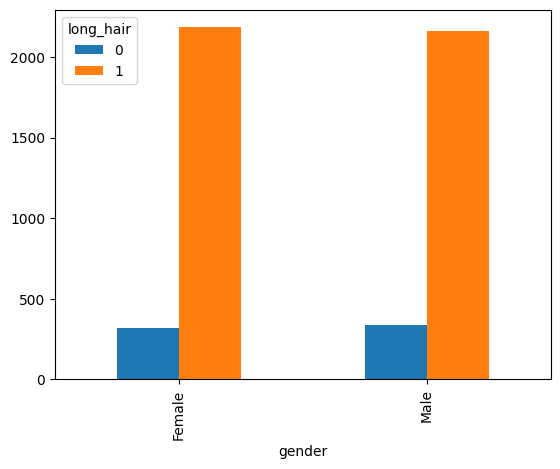

In [3]:
import matplotlib.pyplot as plt
pd.crosstab(df.gender,df.long_hair).plot(kind='bar')

<Axes: xlabel='gender'>

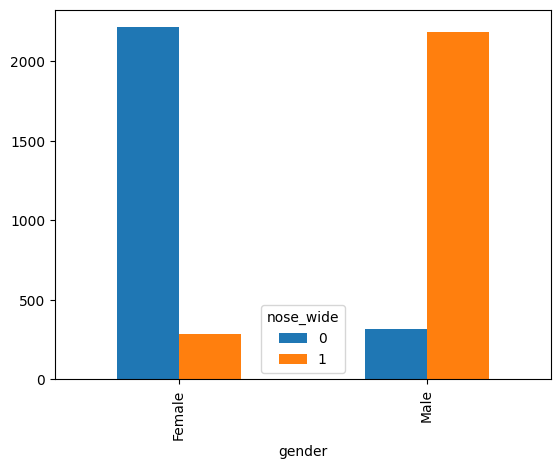

In [4]:
pd.crosstab(df.gender,df.nose_wide).plot(kind='bar')

<Axes: xlabel='gender'>

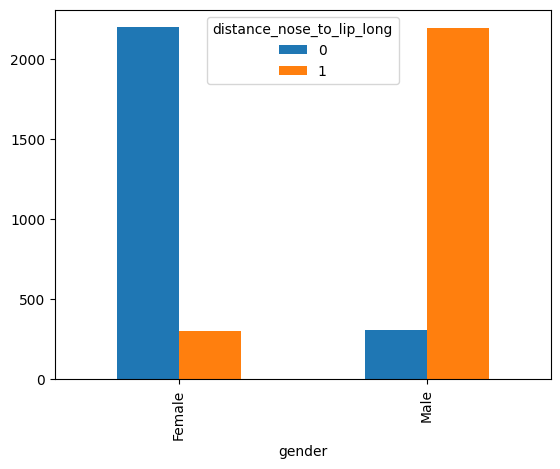

In [7]:
pd.crosstab(df.gender,df.distance_nose_to_lip_long).plot(kind='bar')

In [10]:
df.shape

(5001, 8)

In [11]:
df.nunique()

long_hair                     2
forehead_width_cm            42
forehead_height_cm           21
nose_wide                     2
nose_long                     2
lips_thin                     2
distance_nose_to_lip_long     2
gender                        2
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df.gender)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [13]:
 df.groupby(['gender']).mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
0,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
1,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


In [14]:
x=df.drop(['gender'],axis='columns')
x.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [15]:
y=df.gender
y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.97450,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.97150,{'n_estimators': 10}
2,logistic_regression,0.96600,{'C': 5}
3,naive_bayes_gaussian,0.97075,{}
4,naive_bayes_multinomial,0.95825,{}
5,decision_tree,0.96500,{'criterion': 'gini'}


In [29]:
from sklearn.svm import SVC
model = SVC(C=1, kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1)

In [30]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(1001,))

In [31]:
model.score(x_test,y_test)

0.957042957042957

In [34]:
y_pred= model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[463,  21],
       [ 22, 495]])

Text(58.222222222222214, 0.5, 'Truth')

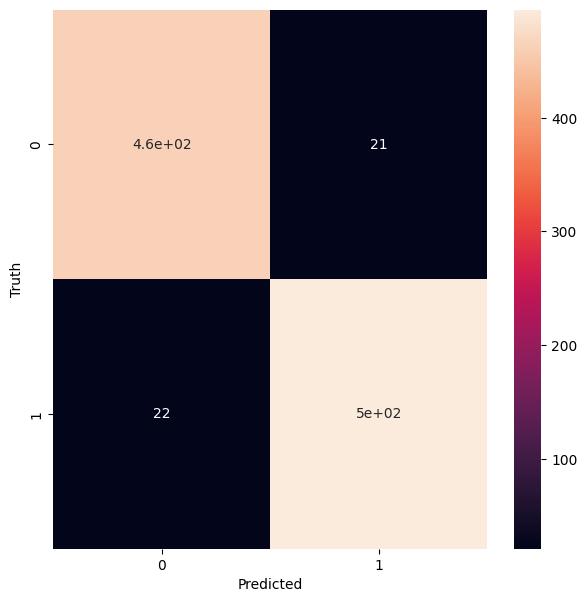

In [36]:
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
import joblib
joblib.dump(model,'Gender_classification_model.joblib')

['Gender_classification_model.joblib']